In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
df=pd.read_csv(r"/content/Advertising (1).csv")


In [3]:
df


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
print("Random Rows: \n")
df.sample(5)


Random Rows: 



,Unnamed: 0,TV,Radio,Newspaper,Sales
63,64,102.7,29.6,8.4,14.0
71,72,109.8,14.3,31.7,12.4
162,163,188.4,18.1,25.6,14.9
199,200,232.1,8.6,8.7,13.4
78,79,5.4,29.9,9.4,5.3


In [5]:
df.shape


(200, 5)

In [6]:
print("Names of columns in advertising sales prediction df are: \n\n",df.columns)


Names of columns in advertising sales prediction df are: 

 Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [7]:
print('\033[1m' + 'Information of dataset:' + '\033[0m\n\n')
df.info()


Information of dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#The size property returns the number of elements in the DataFrame.
#The number of elements is the number of rows * the number of columns.
print("Size of dataset is: ",df.size)

Size of dataset is:  1000


In [9]:
#corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python.
#Any NaN values are automatically excluded.Any non-numeric data type or columns in the Dataframe, it is ignored.0
dc = df.corr()
print("Correlation :\n")
dc

Correlation :



,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [10]:
#Calculate important features of sales
print("Statistics summary: \n")
df.describe()

Statistics summary: 



,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


[Text(0.5, 1.0, 'Heatmap of Correlated values')]

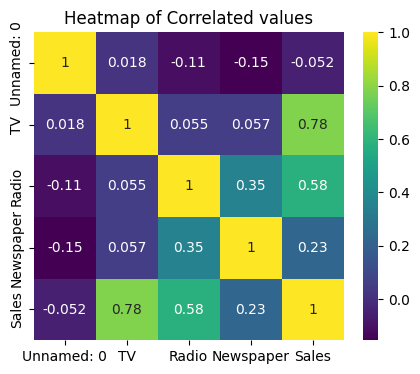

In [11]:
fig, ax = plt.subplots(figsize = (5, 4))
sea.heatmap(dc, annot=True, cmap="viridis").set(title='Heatmap of Correlated values')


In [12]:
df.dtypes


Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [13]:
df.duplicated().value_counts()


False    200
Name: count, dtype: int64

In [14]:
df.isnull().sum()


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

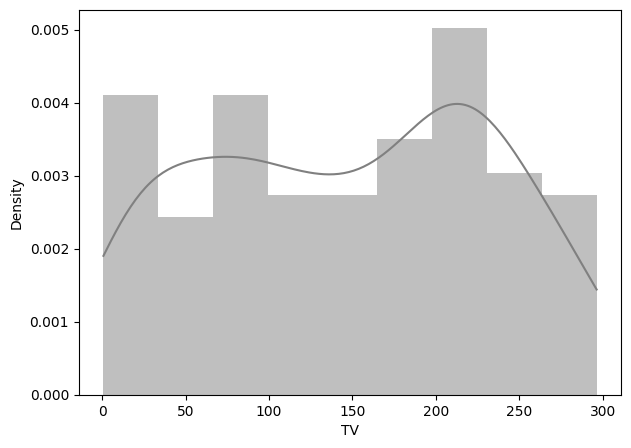

In [15]:
plt.figure(figsize=(7,5))
sea.histplot(df['TV'], color="grey", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()


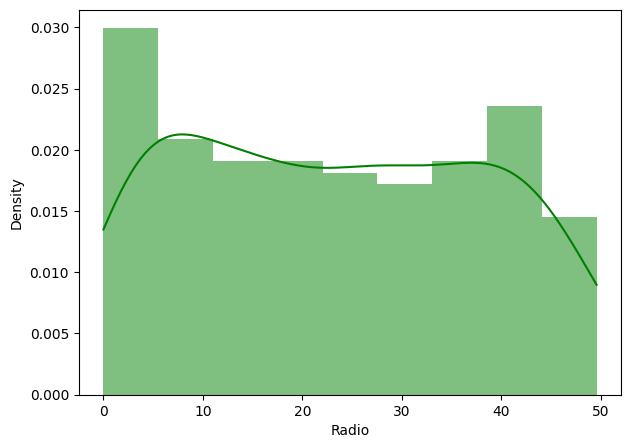

In [16]:
plt.figure(figsize=(7,5))
sea.histplot(df['Radio'], color="green", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

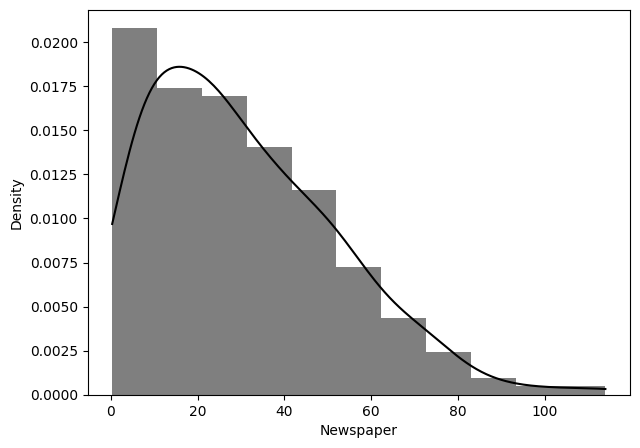

In [17]:
plt.figure(figsize=(7,5))
sea.histplot(df['Newspaper'], color="black", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()


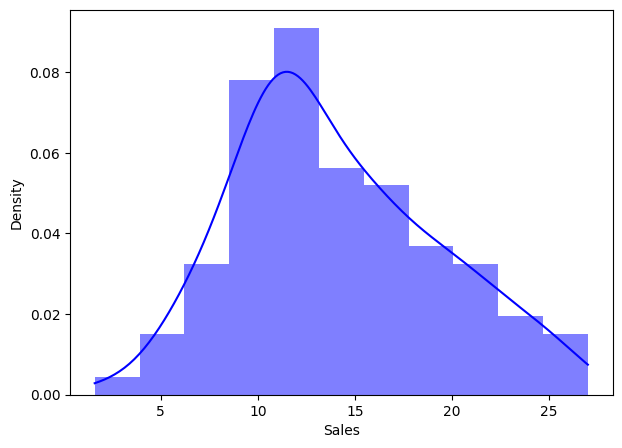

In [18]:
plt.figure(figsize=(7,5))
sea.histplot(df['Sales'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

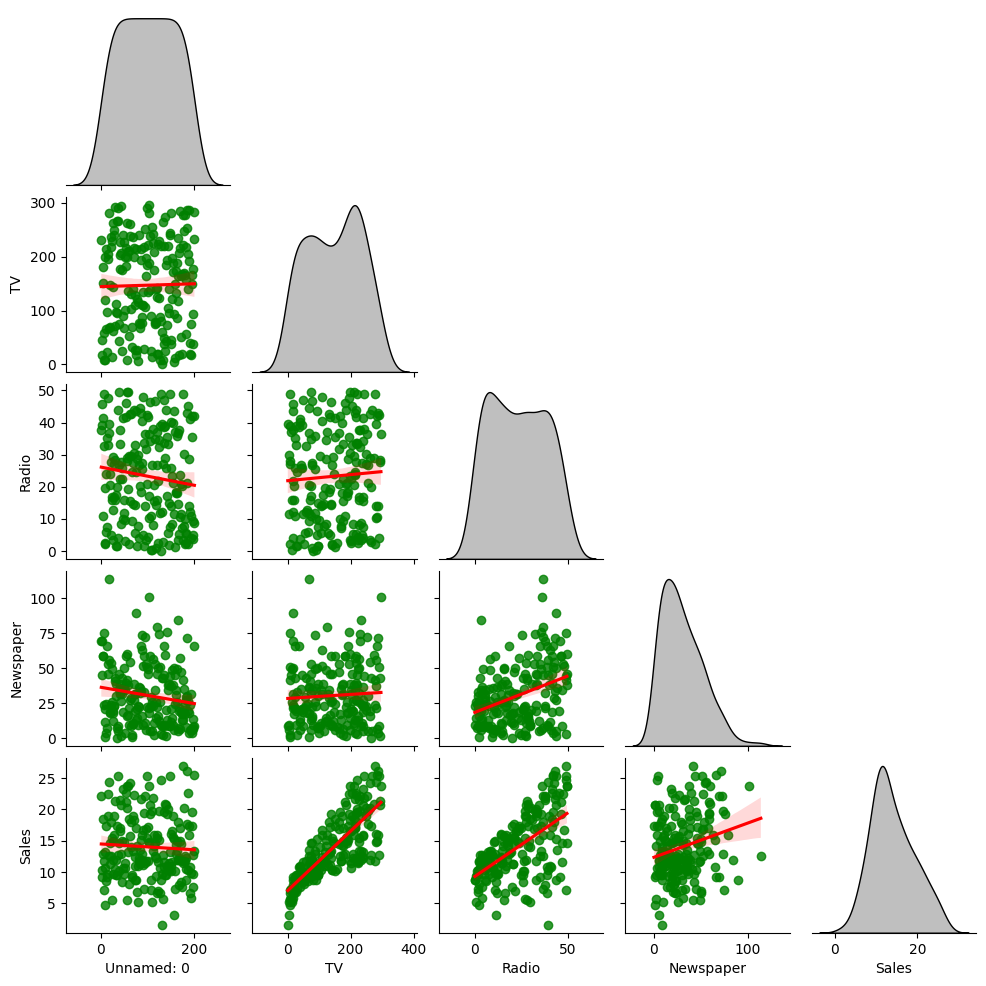

In [19]:
sea.pairplot(df,corner=True,diag_kind='kde',kind='reg',height=2,plot_kws={'color':'green','line_kws':{'color':'red'}},diag_kws={'color':'black'});


In [20]:
x =np.array(df.drop(labels=['Sales'], axis=1))


In [21]:
y =np.array(df['Sales'])


In [22]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2 ,random_state = 45)
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)

Shape of x_train (160, 4)
Shape of y_train (160,)


In [23]:
reg= LinearRegression()


In [24]:
#Use training set to fit the model
reg.fit(x_train, y_train)

LinearRegression()

In [25]:
#COEFFICIENT
coefficient = reg.coef_
coefficient

array([-0.00202696,  0.04712224,  0.18277083, -0.00554797])

In [26]:
#INTERCEPT
intercept = reg.intercept_
intercept


3.2093049125748365

In [27]:
#The pred variable now contains all the predicted values for the input values in the X_test
pred = reg.predict(x_test)


#Show the prediction of sales and the test part of sales
compare= pd.DataFrame({"Actual_sales":list(y_test),"predicted_sales":list(pred)})
compare.head(15)

,Actual_sales,predicted_sales
0,14.9,15.304751
1,8.8,10.248574
2,16.6,16.568926
3,23.8,21.879357
4,12.0,16.076553
5,9.7,9.124459
6,19.0,18.016036
7,11.8,11.401521
8,18.5,17.564095
9,8.5,8.757843


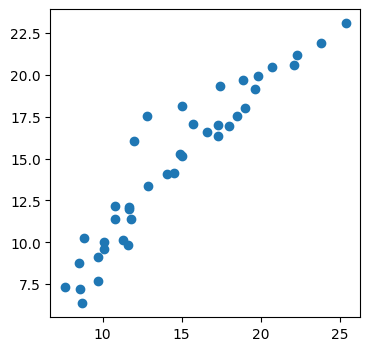

In [28]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, pred)


In [29]:
mae = mean_absolute_error(y_test, pred)
print(f'Mean absolute error: {mae:.2f}')

Mean absolute error: 1.10


Mean Squared Error (MSE)


In [30]:
mse = mean_squared_error(y_test, pred)
print(f'Mean squared error: {mse:.2f}')


Mean squared error: 2.34


Root Mean Squared Error (RMSE)


In [31]:
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 1.53
